# <b><div style='padding:15px;background-color:#1167b1;color:white;border-radius:2px;font-size:110%;text-align: center'>Telcom Churn Data</div></b>

Within the following analysis, I will be looking at the Telcome Churn dataset from Kaggle. The focus of this analysis will be looking for patterns within the data to gain insights and determine the direction for machine learning processes.

## <b><div style='padding:15px;background-color:#1167b1;color:white;border-radius:2px;font-size:110%;text-align: center'>Import modules and load the data</div></b>

The first step of the analysis is to import the data and gain a general big picture of the dataset. This will include:
1. Importing all libraries for data manipulation and visualization
2. Load the data
3. Explore high level features of the dataset
4. Explore descriptive statistics

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('churn.csv')

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 7043
Number of columns: 21


It can be seen above that the dataset contains 7043 rows relating to customers using the companies services. There are also 21 columns (features) with the first column containing customerID which is used as a unique ID for the customers.

In [34]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values within the data.

In [35]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [37]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Looking at the information, it appears that most of the features within the dataset are objects. Two features (SeniorCitizen and TotalCharges) jump out as possibly being recorded as the wrong datatype and will be analyzed further.

In [38]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [39]:
df.SeniorCitizen = df.SeniorCitizen.astype('object')

In [40]:
pd.pivot_table(df, index = 'TotalCharges', values = 'tenure').sort_values('TotalCharges')

,tenure
TotalCharges,
,0.0
100.2,5.0
100.25,1.0
100.35,6.0
100.4,5.0
...,...
997.75,51.0
998.1,55.0
999.45,13.0


In [41]:
df.TotalCharges.replace(' ', 0, inplace = True) 

In [42]:
df.TotalCharges = df.TotalCharges.astype('float')

After a further look, it does appear that SeniorCitizen should have been an object datatype. Also, TotalCharges was found to have 11 values with a blank that was being picked up as a string value. These values were changed to 0 as to allow this variable to changed to an numerical integer.

#### <b><div style='padding:15px;background-color:#1167b1;color:white;border-radius:2px;font-size:110%;text-align: center'>Feature Engineering</div></b>

In [43]:
#create a new feature, number of services
service_cols = ['PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
 # First five columns

# Add a new variable 'Count' that counts 'Yes' entries and checks for 'DSL' or 'Fiber optic'
df['Num_Services'] = df[service_cols].apply(lambda row: row.eq('Yes').sum(), axis=1) + df['InternetService'].apply(lambda x: 1 if x in ['DSL', 'Fiber optic'] else 0)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Num_Services
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2


In [44]:
df_eda = df.copy()
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### <b><div style='padding:15px;background-color:#1167b1;color:white;border-radius:2px;font-size:110%;text-align: center'>Numerical Features</div></b>

In [45]:
# a look at the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
Num_Services,7043.0,3.724407,2.100232,1.00,2.00,4.00,5.00,8.00


The mean and standard deviations are relatively close within the tenure and MonthlyCharges variables, indicating that there might not be a significant skew. The TotalCharges looks like it could be skewed as the mean is significantly higher than the median.

<Axes: xlabel='tenure', ylabel='Count'>

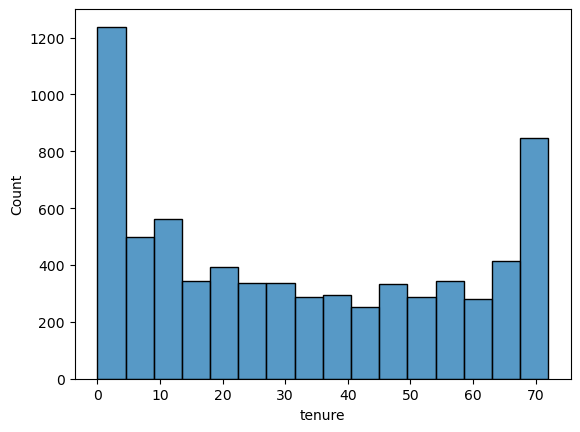

In [46]:
sns.histplot(df_eda.tenure)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

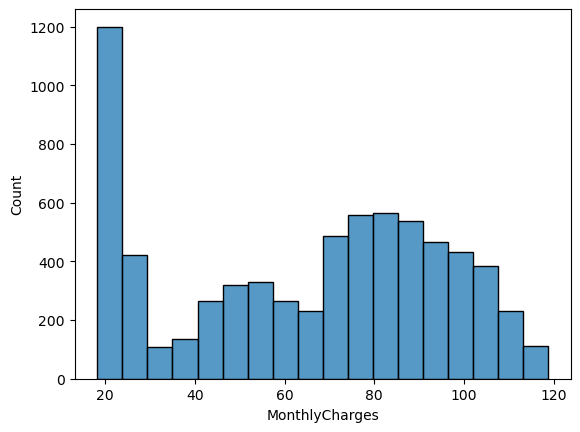

In [47]:
sns.histplot(df_eda.MonthlyCharges)

<Axes: xlabel='TotalCharges', ylabel='Count'>

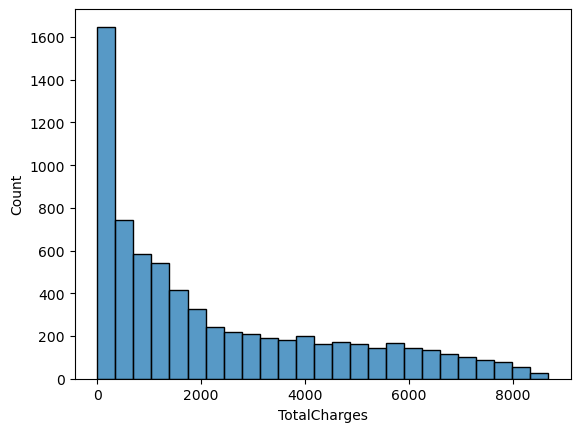

In [48]:
sns.histplot(df_eda.TotalCharges)

All three histograms have a peak around 0, this would indicate there was a large number of customers who signed up for the service but left within the first month. It would be interesting to see if there were promotions that were used and then the customer moved or ended their contract. There does appear to be a strong skew right in the TotalCharges variable.

In [49]:
corr = df_eda.corr()
corr

C:\Users\wbpar\AppData\Local\Temp\ipykernel_29192\3524886524.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_eda.corr()


,tenure,MonthlyCharges,TotalCharges,Num_Services
tenure,1.000000,0.247900,0.826178,0.443681
MonthlyCharges,0.247900,1.000000,0.651174,0.822187
TotalCharges,0.826178,0.651174,1.000000,0.744813
Num_Services,0.443681,0.822187,0.744813,1.000000


Many of these variables seem to be correlated with each other, meaning we could potentially drop some of them as they aren't explaining enough extra variation to warrant the possible multicollinearity issues. The new variable Num_Services is highly correlated with both charges variables, which makes sense as these would most likely move up and down with the number of services a customer recieves.

#### <b><div style='padding:15px;background-color:#1167b1;color:white;border-radius:2px;font-size:110%;text-align: center'>Categorical Features</div></b>

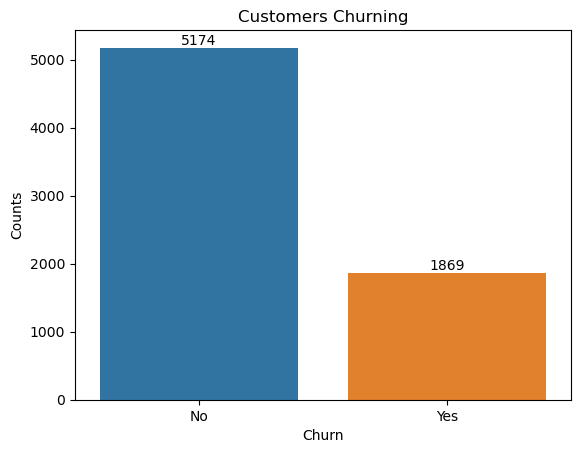

In [50]:
ax = plt.subplots()
ax = sns.countplot(data = df_eda, x = df.Churn)
ax.set(ylabel = 'Counts', title = 'Customers Churning')
ax.bar_label(ax.containers[0])
plt.show()

It can be seen that the data is definitely unbalanced, which would need to be accounted for during the analysis. The company seems to be doing a pretty good job of keeping people from churning. Are there factors in common with people who churn?

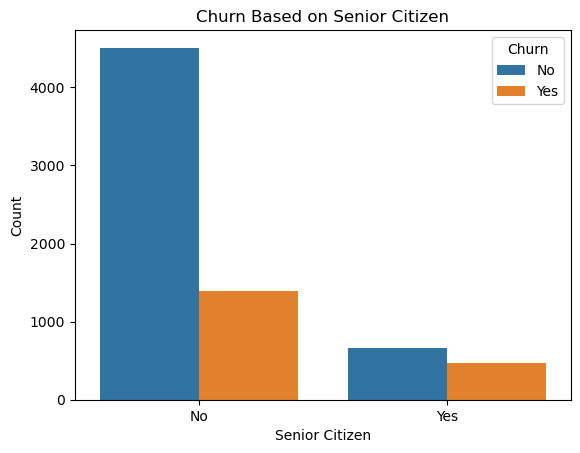

In [51]:
ax = sns.countplot(data = df_eda, x = 'SeniorCitizen', hue = 'Churn')
ax.set(xlabel = 'Senior Citizen', ylabel = 'Count', title = 'Churn Based on Senior Citizen')
ax.set_xticklabels(labels = ['No', 'Yes'])
plt.show()

In [52]:
def percent_plot(col):
    col_counts = (df_eda.groupby([col])['Churn']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
    plt.figure(figsize = (10,6))
    ax = sns.barplot(x=col, y='percentage', hue='Churn', data=col_counts)
    ax.set(ylabel = 'Percentage')

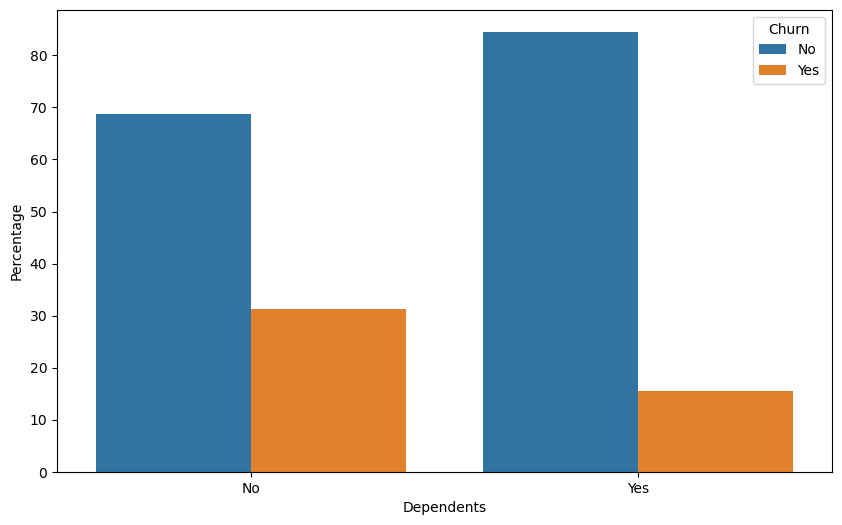

In [53]:
percent_plot('Dependents')

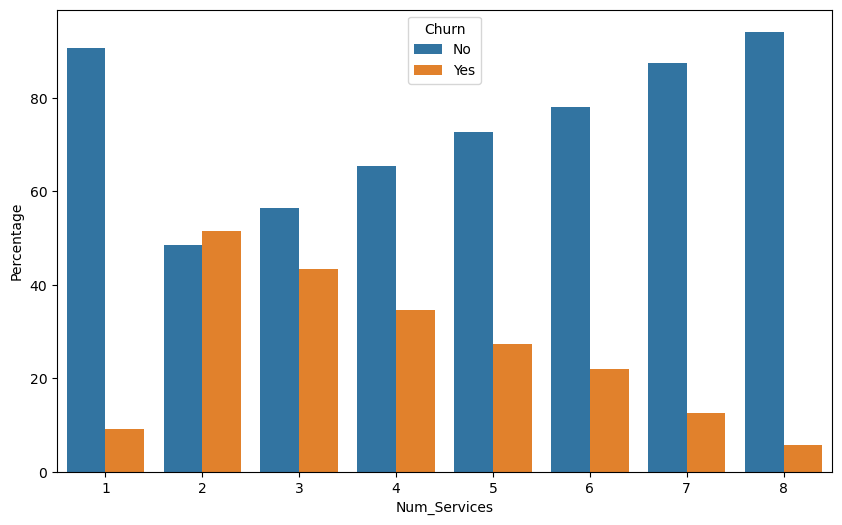

In [54]:
percent_plot('Num_Services')

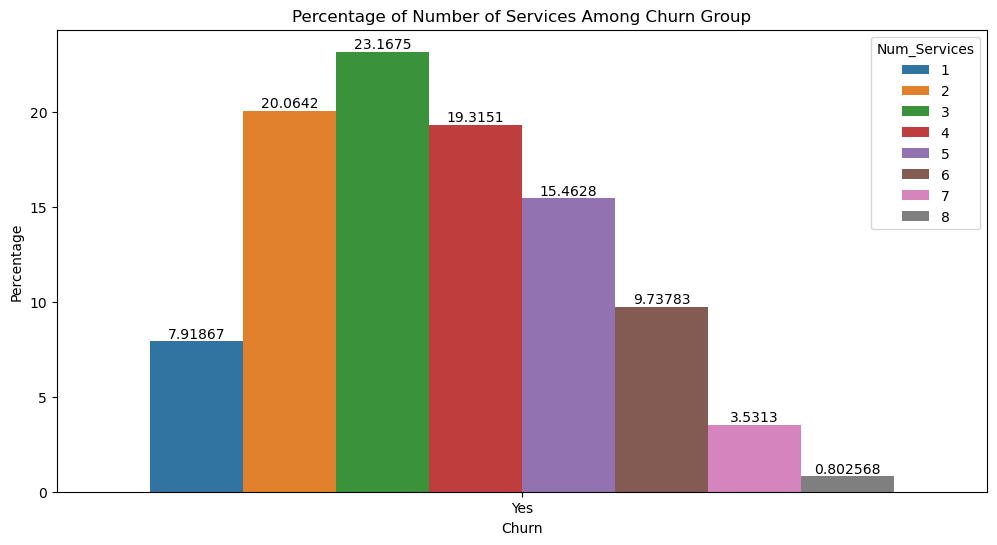

In [55]:
col_counts = (df_eda.groupby(['Churn'])['Num_Services']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())

plt.figure(figsize = (12,6))
ax = sns.barplot(x='Churn', y='percentage', hue='Num_Services', data=col_counts[col_counts['Churn'] == 'Yes'])
ax.set(ylabel = 'Percentage', title = 'Percentage of Number of Services Among Churn Group')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
ax.bar_label(ax.containers[5])
ax.bar_label(ax.containers[6])
ax.bar_label(ax.containers[7])
plt.show()

From this analysis, it appears that the company should focus on customers with two, three, and even four services as they are the ones that appear to have a large percentage of people who leave the company. It also looks like there is a higher probability of a customer leaving if they don't have dependents. 